In [63]:
#LIBRARIES


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np



In [64]:

# DATASET LOADING
data = pd.read_csv('/content/sample_data/customer_booking.csv', encoding="ISO-8859-1")



In [65]:
data.head(7)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0


In [66]:
data.tail(7)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49993,1,Internet,RoundTrip,19,6,12,Sun,PERPNH,Australia,1,0,0,5.62,0
49994,2,Internet,RoundTrip,25,6,9,Sun,PERPNH,Australia,0,0,0,5.62,0
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [68]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [69]:
data.shape

(50000, 14)

In [70]:
data.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [71]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [72]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())



Missing values:
 num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [73]:
# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


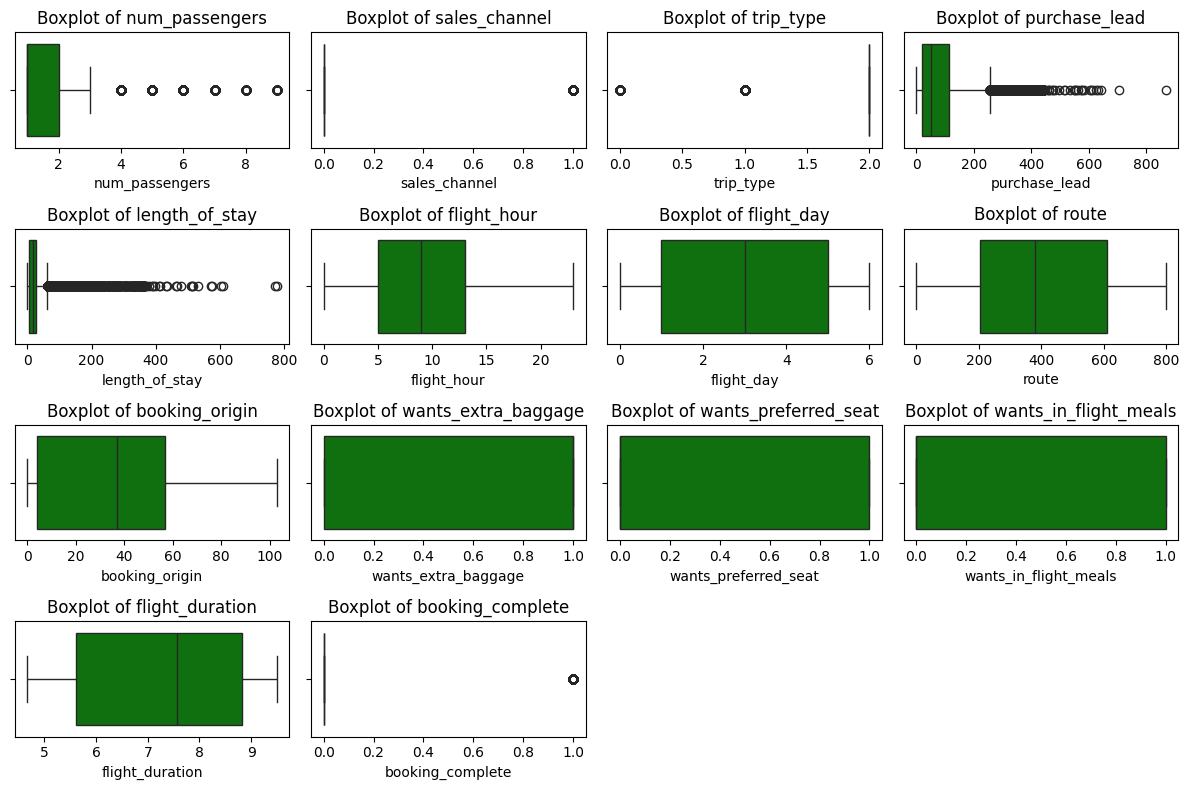

In [74]:
# Outlier detection using boxplots with green color
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=data[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



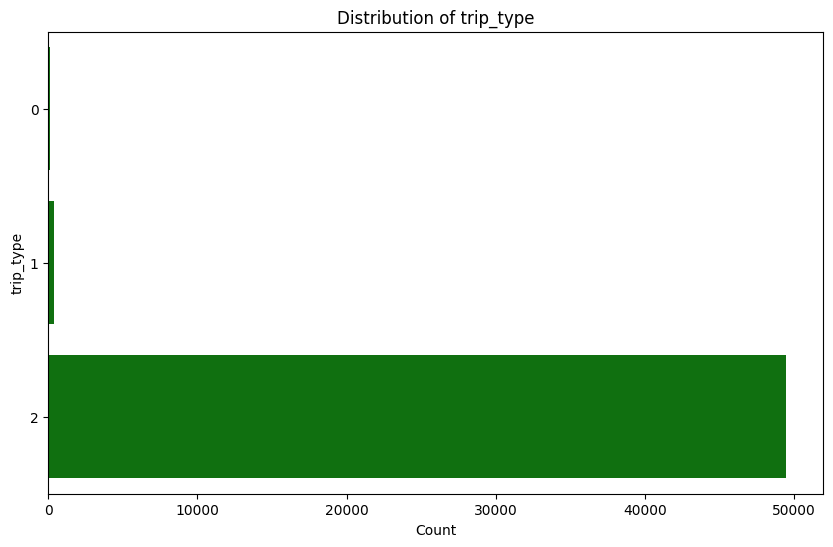

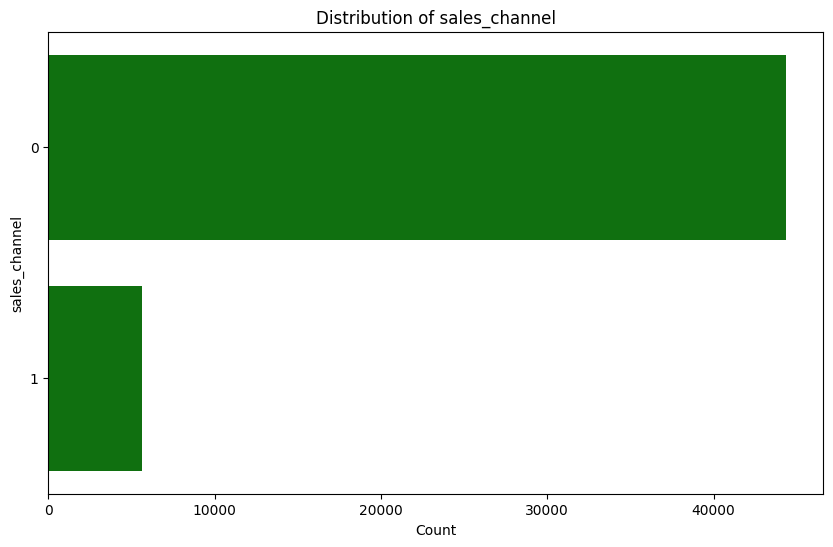

In [75]:
# Separate bar graphs for selected columns with green color
for col in [ 'trip_type', 'sales_channel']:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


Random Forest Performance Metrics:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.18      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



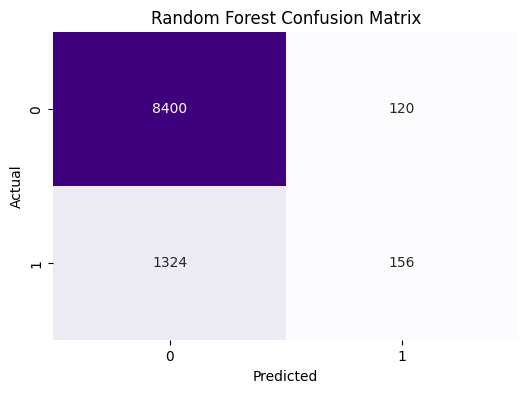


Decision Tree Performance Metrics:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8520
           1       0.29      0.33      0.31      1480

    accuracy                           0.78     10000
   macro avg       0.58      0.59      0.59     10000
weighted avg       0.79      0.78      0.79     10000



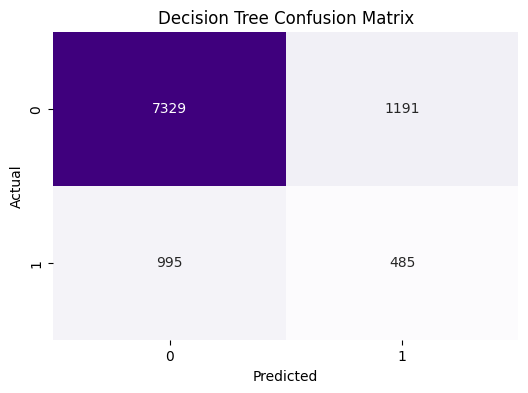


CatBoost Performance Metrics:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.55      0.08      0.13      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.53      0.53     10000
weighted avg       0.81      0.85      0.80     10000



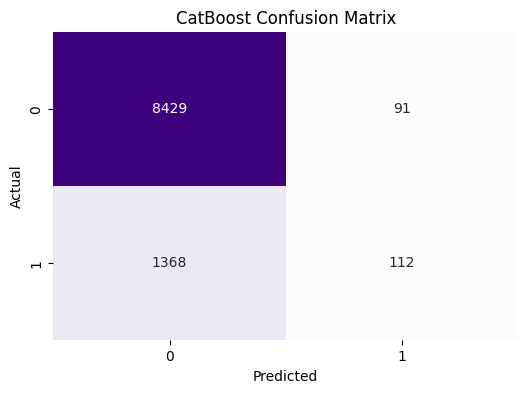

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance Metrics:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



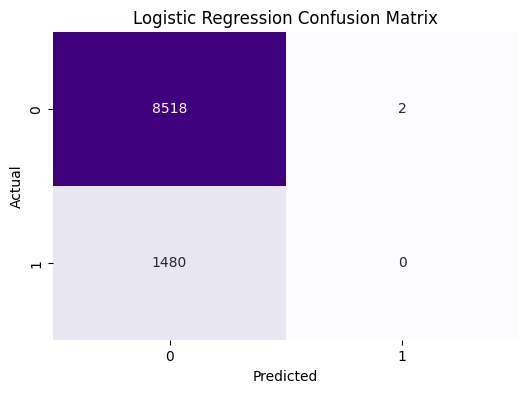


SVM Performance Metrics:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Unde

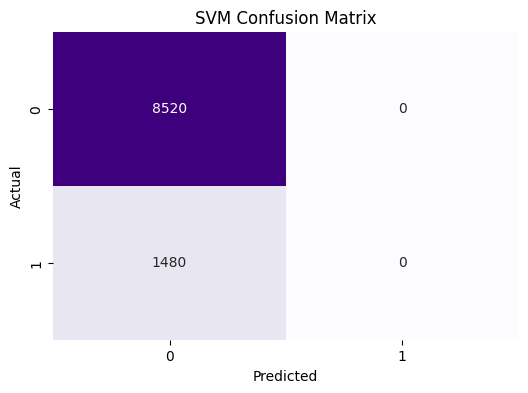


Naive Bayes Performance Metrics:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8520
           1       0.24      0.09      0.14      1480

    accuracy                           0.82     10000
   macro avg       0.55      0.52      0.52     10000
weighted avg       0.77      0.82      0.79     10000



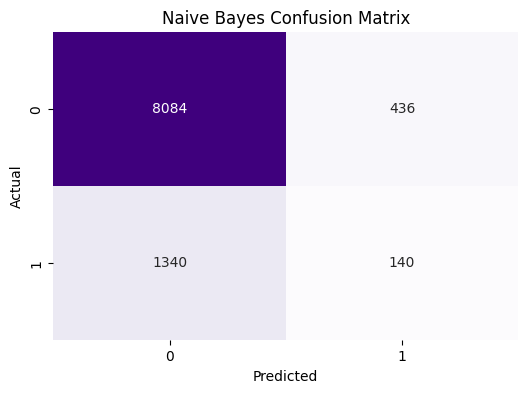


XGBoost Performance Metrics:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.51      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



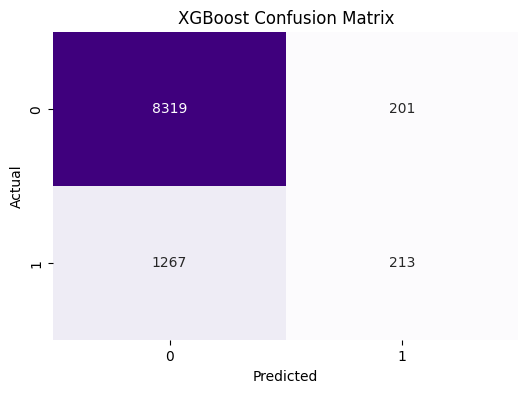


AdaBoost Performance Metrics:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.54      0.03      0.05      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.51      0.49     10000
weighted avg       0.81      0.85      0.79     10000



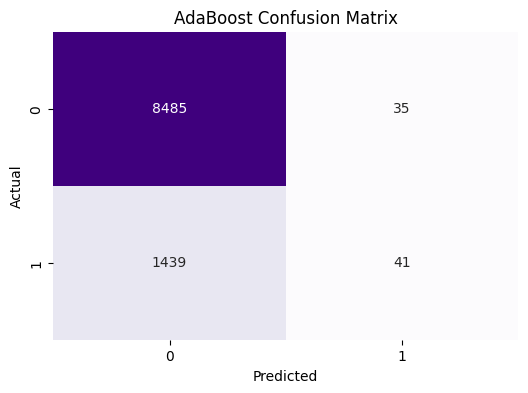


Best classifier based on Accuracy: Random Forest


In [77]:
# Prepare features and target variable
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train classifiers and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }

    print(f"\n{name} Performance Metrics:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Determine the best classifier based on accuracy
best_classifier = max(results, key=lambda k: results[k]['Accuracy'])
print(f"\nBest classifier based on Accuracy: {best_classifier}")


In [78]:
# Determine the top 3 classifiers based on accuracy
top_3_classifiers = sorted(results.items(), key=lambda x: x[1]['Accuracy'], reverse=True)[:3]
print("\nTop 3 Classifiers Based on Accuracy:")
for name, metrics in top_3_classifiers:
    print(f"{name} - Accuracy: {metrics['Accuracy']:.2f}")


Top 3 Classifiers Based on Accuracy:
Random Forest - Accuracy: 0.86
CatBoost - Accuracy: 0.85
XGBoost - Accuracy: 0.85


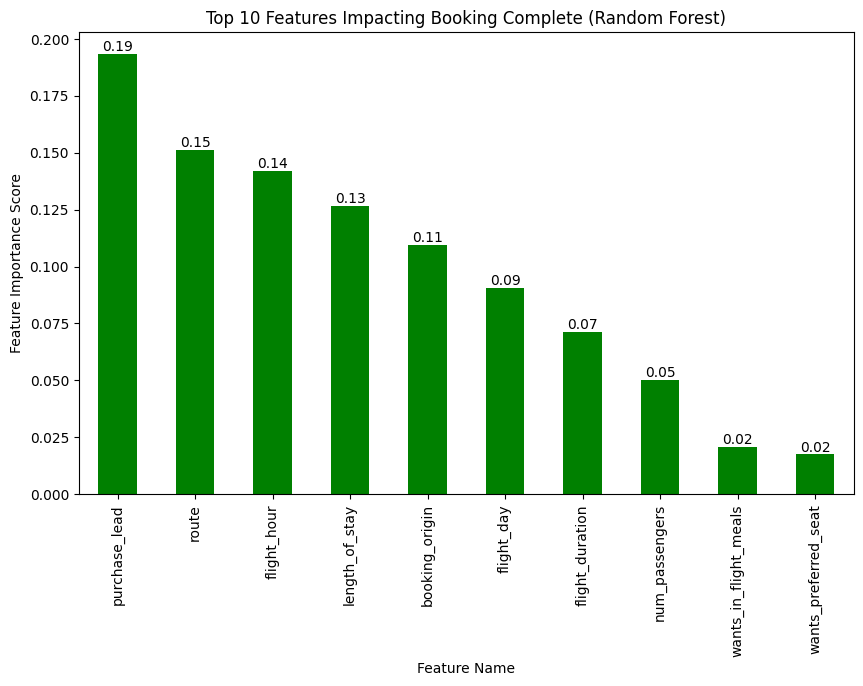

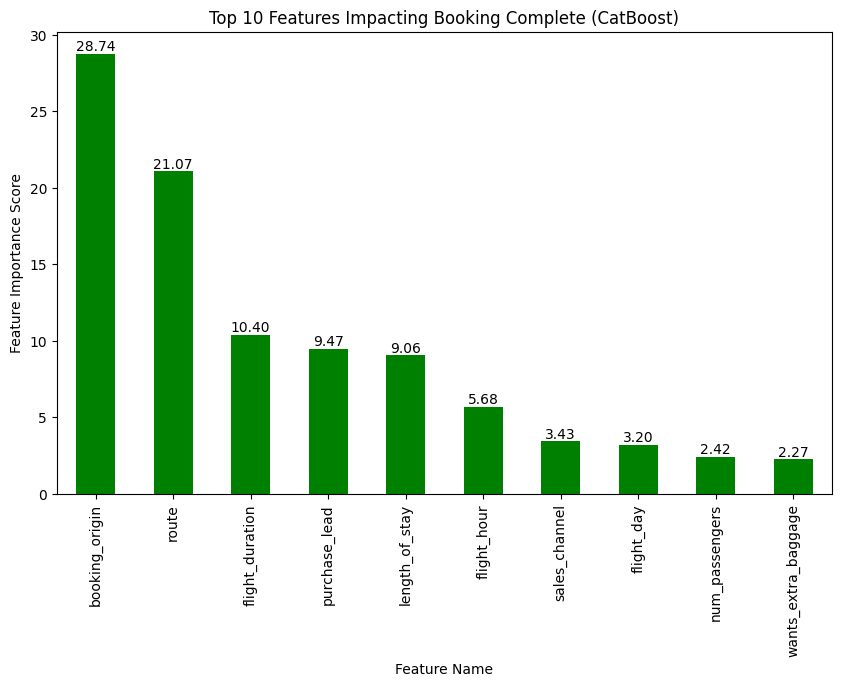

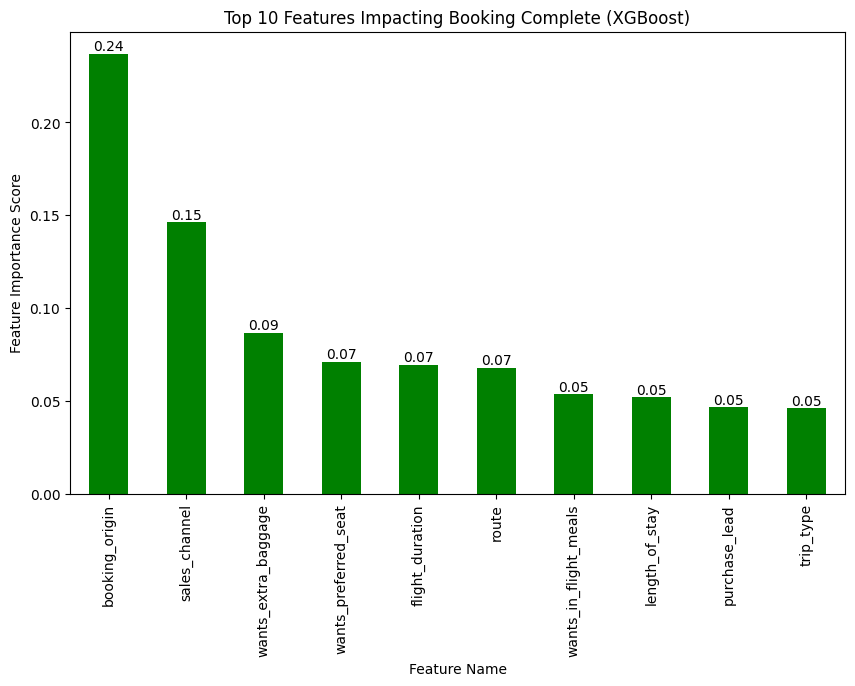

In [79]:
# Feature importance visualization for top classifiers
def plot_feature_importance(model, model_name, top_n=10):
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.Series(model.feature_importances_, index=X.columns)
        top_features = feature_importances.nlargest(top_n)
        plt.figure(figsize=(10, 6))
        top_features.plot(kind='bar', color='green')
        plt.xlabel('Feature Name')
        plt.ylabel('Feature Importance Score')
        plt.title(f'Top {top_n} Features Impacting Booking Complete ({model_name})')
        for index, value in enumerate(top_features):
            plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
        plt.show()
    else:
        print(f"{model_name} does not support feature importance.")

# Plot feature importances for top 3 classifiers
for name, _ in top_3_classifiers:
    model = classifiers[name]
    plot_feature_importance(model, name)